In [1]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [13]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_syn, y_syn = make_regression(n_samples=100, n_features=1, noise=0.1)
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3)
model = KNeighborsRegressor()
model.fit(X_syn_train, y_syn_train)
y_syn_pred = model.predict(X_syn_test)
print("MSE:", mean_squared_error(y_syn_test, y_syn_pred))


MSE: 1.3014994609724486


In [16]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.
for metric in ['euclidean', 'manhattan']:
    model = KNeighborsClassifier(metric=metric)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{metric} accuracy:", accuracy_score(y_test, y_pred))
    model.fit(X_train_scaled, y_train)
    print(f"{metric} accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))


ValueError: Found input variables with inconsistent numbers of samples: [105, 70]

In [5]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries
import matplotlib.pyplot as plt
accuracies = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test_scaled)))
plt.plot(range(1, 11), accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [105, 70]

In [6]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Without scaling:", accuracy_score(y_test, model.predict(X_test)))
model.fit(X_train_scaled, y_train)
print("With scaling:", accuracy_score(y_test, model.predict(X_test_scaled)))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [7]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component.
from sklearn.decomposition import PCA
X, _ = make_regression(n_samples=100, n_features=5, noise=0.1)
pca = PCA()
pca.fit(X)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.27419776 0.21668611 0.20552963 0.17075075 0.13283575]


In [8]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)
print("PCA + KNN Accuracy:", accuracy_score(y_test, model.predict(X_test_pca)))


ValueError: Found input variables with inconsistent numbers of samples: [105, 70]

In [10]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1, 11))}
gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gscv.fit(X_train_scaled, y_train)
print("Best K:", gscv.best_params_)


ValueError: Found input variables with inconsistent numbers of samples: [105, 70]

In [11]:
# 29. Train a KNN Classifier and check the number of misclassified samples.
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Misclassified samples:", sum(y_pred != y_test))


ValueError: Found input variables with inconsistent numbers of samples: [105, 70]

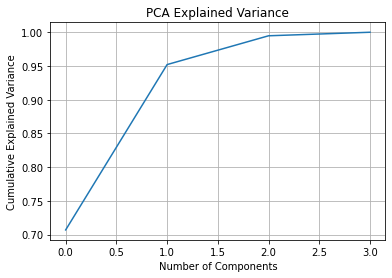

In [17]:
# 30. Train a PCA model and visualize the cumulative explained variance.
import numpy as np
pca = PCA()
pca.fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [18]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

for weight in ['uniform', 'distance']:
    model = KNeighborsClassifier(weights=weight)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Weights={weight}, Accuracy={accuracy_score(y_test, y_pred):.4f}")


Weights=uniform, Accuracy=1.0000
Weights=distance, Accuracy=1.0000


In [19]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance.
mse_values = []
for k in range(1, 11):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_reg, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    mse_values.append(-scores.mean())
print("MSE for K values 1 to 10:", mse_values)


MSE for K values 1 to 10: [0.08666666666666667, 0.08499999999999999, 0.08148148148148149, 0.08125, 0.07733333333333334, 0.07074074074074074, 0.08040816326530613, 0.08135416666666666, 0.08798353909465022, 0.0884]


In [20]:
# 33. Implement KNN Imputation for handling missing values in a dataset.
X_missing = X.copy()
X_missing[::10] = np.nan
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)
print("Missing values imputed successfully.")


Missing values imputed successfully.


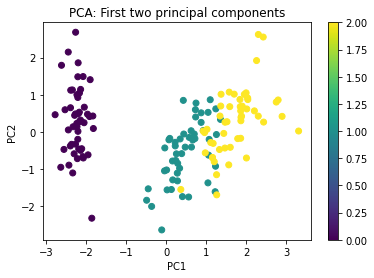

In [21]:
# 34. Train a PCA model and visualize the data projection onto the first two principal components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA: First two principal components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()


In [22]:
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.
for algorithm in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algorithm)
    model.fit(X_train, y_train)
    print(f"{algorithm} accuracy: {model.score(X_test, y_test):.4f}")


kd_tree accuracy: 1.0000
ball_tree accuracy: 1.0000


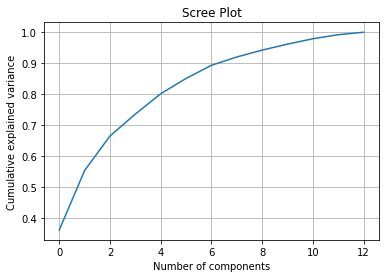

In [23]:
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.
wine = load_wine()
X_wine = wine.data
X_wine_scaled = scaler.fit_transform(X_wine)
pca = PCA()
pca.fit(X_wine_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Scree Plot")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()


In [24]:
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [25]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy.
for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X_scaled)
    print(f"Components: {n}, Variance Ratio: {pca.explained_variance_ratio_.sum():.4f}")


Components: 1, Variance Ratio: 0.7296
Components: 2, Variance Ratio: 0.9581
Components: 3, Variance Ratio: 0.9948
Components: 4, Variance Ratio: 1.0000


In [26]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy.
for leaf in [10, 20, 30, 40]:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"leaf_size={leaf}, Accuracy={acc:.4f}")


leaf_size=10, Accuracy=1.0000
leaf_size=20, Accuracy=1.0000
leaf_size=30, Accuracy=1.0000
leaf_size=40, Accuracy=1.0000


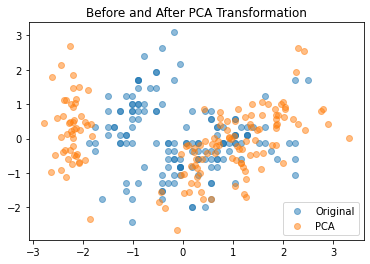

In [27]:
# 40. Train a PCA model and visualize how data points are transformed before and after PCA.
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5, label='Original')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5, label='PCA')
plt.legend()
plt.title("Before and After PCA Transformation")
plt.show()


In [28]:
# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
model = KNeighborsClassifier()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine_scaled, wine.target, test_size=0.2, random_state=42)
model.fit(X_train_w, y_train_w)
y_pred_w = model.predict(X_test_w)
print(classification_report(y_test_w, y_pred_w))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [29]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    model = KNeighborsRegressor(metric=metric)
    scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    print(f"Metric={metric}, MSE={-scores.mean():.4f}")


Metric=euclidean, MSE=0.0773
Metric=manhattan, MSE=0.0747
Metric=chebyshev, MSE=0.1085


In [30]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score.
y_bin = label_binarize(y, classes=[0, 1, 2])
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)
auc_score = roc_auc_score(label_binarize(y_test, classes=[0,1,2]), y_scores, multi_class='ovr')
print(f"ROC-AUC Score: {auc_score:.4f}")


ROC-AUC Score: 1.0000


Variance explained by each component: [0.72962445 0.22850762 0.03668922 0.00517871]


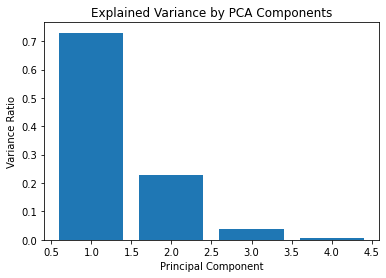

In [31]:
# 44. Train a PCA model and visualize the variance captured by each principal component.
pca = PCA()
pca.fit(X_scaled)
explained = pca.explained_variance_ratio_
print("Variance explained by each component:", explained)
plt.bar(range(1, len(explained)+1), explained)
plt.title("Explained Variance by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()


In [32]:
# 45. Train a KNN Classifier and perform feature selection before training.
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)
model = KNeighborsClassifier()
score = cross_val_score(model, X_selected, y, cv=5).mean()
print(f"Accuracy after feature selection: {score:.4f}")

# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = ((X_scaled - X_reconstructed) ** 2).mean()
print(f"Reconstruction error: {reconstruction_error:.4f}")


Accuracy after feature selection: 0.9667
Reconstruction error: 0.0419


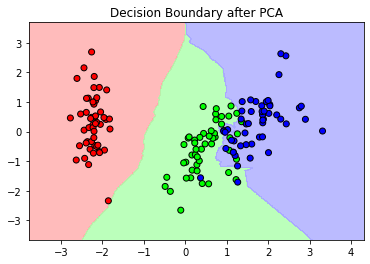

In [33]:
# 47. Train a KNN Classifier and visualize the decision boundary.
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(title)
    plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
knn = KNeighborsClassifier(n_neighbors=5)
plot_decision_boundary(X_pca, y, knn, "Decision Boundary after PCA")


In [34]:
# 48. Train a PCA model and analyze the effect of different numbers of components on data variance.
for n in range(1, 5):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    print(f"Components: {n}, Total Variance: {sum(pca.explained_variance_ratio_):.4f}")


Components: 1, Total Variance: 0.7296
Components: 2, Total Variance: 0.9581
Components: 3, Total Variance: 0.9948
Components: 4, Total Variance: 1.0000
